In [2]:
#loading data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
prior = pd.read_csv('order_products__prior.csv')
train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [3]:
# create merged dataframe of all orders

all_orders = pd.concat([prior,train],axis = 0)
all_orders = all_orders.merge(products[['product_id','aisle_id','department_id']], how = 'inner', on = 'product_id')
all_orders = all_orders.merge(aisles, on = 'aisle_id')
all_orders = all_orders.merge(departments, on = 'department_id')
all_orders = all_orders.merge(orders[['order_id','user_id','order_hour_of_day']], on = 'order_id')
all_orders = all_orders.merge(products[['product_id','product_name']], on = 'product_id')

In [4]:
all_orders = all_orders[['order_id','add_to_cart_order','reordered','order_hour_of_day','product_id','product_name','aisle_id','aisle','department_id','department','user_id']]
all_orders.head()

,order_id,add_to_cart_order,reordered,order_hour_of_day,product_id,product_name,aisle_id,aisle,department_id,department,user_id
0,2,1,1,9,33120,Organic Egg Whites,86,eggs,16,dairy eggs,202279
1,26,5,0,16,33120,Organic Egg Whites,86,eggs,16,dairy eggs,153404
2,120,13,0,8,33120,Organic Egg Whites,86,eggs,16,dairy eggs,23750
3,327,5,1,9,33120,Organic Egg Whites,86,eggs,16,dairy eggs,58707
4,390,28,1,12,33120,Organic Egg Whites,86,eggs,16,dairy eggs,166654


In [5]:
print(str(len(all_orders.user_id.unique())) +' customers')
print(str(len(all_orders.order_id.unique())) +' order')
print(str(len(all_orders.aisle_id.unique())) +' aisles')
print(str(len(all_orders.product_id.unique())) +' products')

156355 customers
235239 order
134 aisles
42788 products


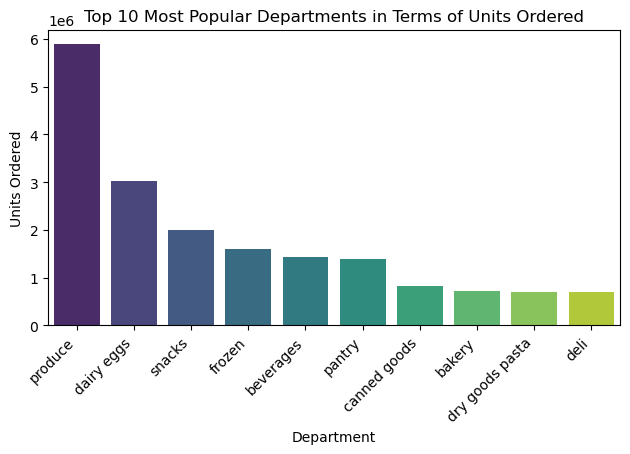

In [6]:


data = all_orders.groupby('department')['add_to_cart_order'].sum().sort_values(ascending=False).reset_index()[0:10]
x = sns.barplot(data=data, x='department', y='add_to_cart_order', palette='viridis')

x.set_xticklabels(x.get_xticklabels(), rotation=45, horizontalalignment='right')

x.set(xlabel='Department', ylabel='Units Ordered')
plt.title('Top 10 Most Popular Departments in Terms of Units Ordered')

plt.tight_layout()
plt.show()


In [7]:
selected_products = all_orders[all_orders['department'] == 'produce']['product_name'].unique()
selected_products

array(['Michigan Organic Kale', 'Carrots', 'Classic Blend Cole Slaw', ...,
       'Organic Southwest Style Salad', 'Radish Coins', 'Red Currants'],
      dtype=object)

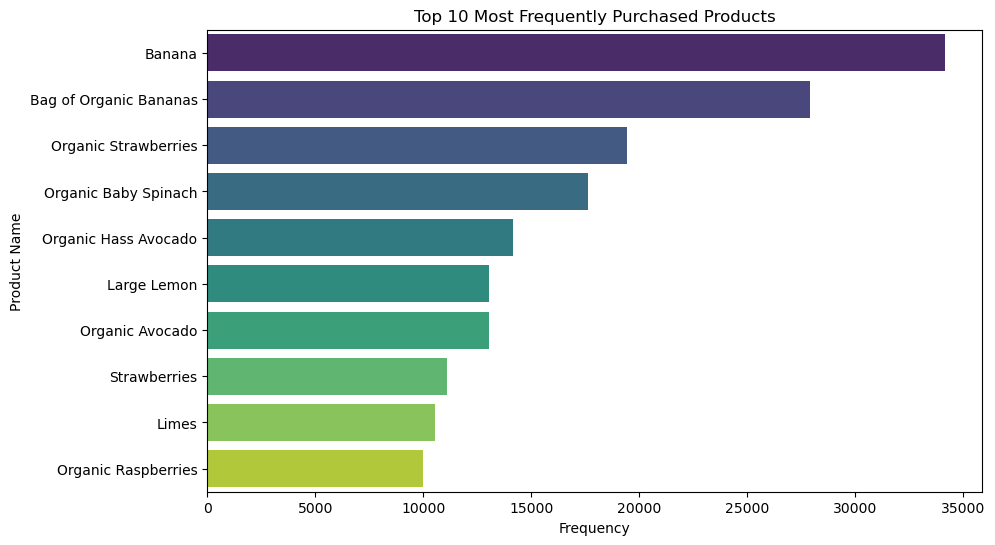

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Most frequently purchased products
product_popularity = all_orders['product_name'].value_counts().head(10)
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=product_popularity.values, y=product_popularity.index, palette='viridis')
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Frequency')
plt.ylabel('Product Name')
plt.show()

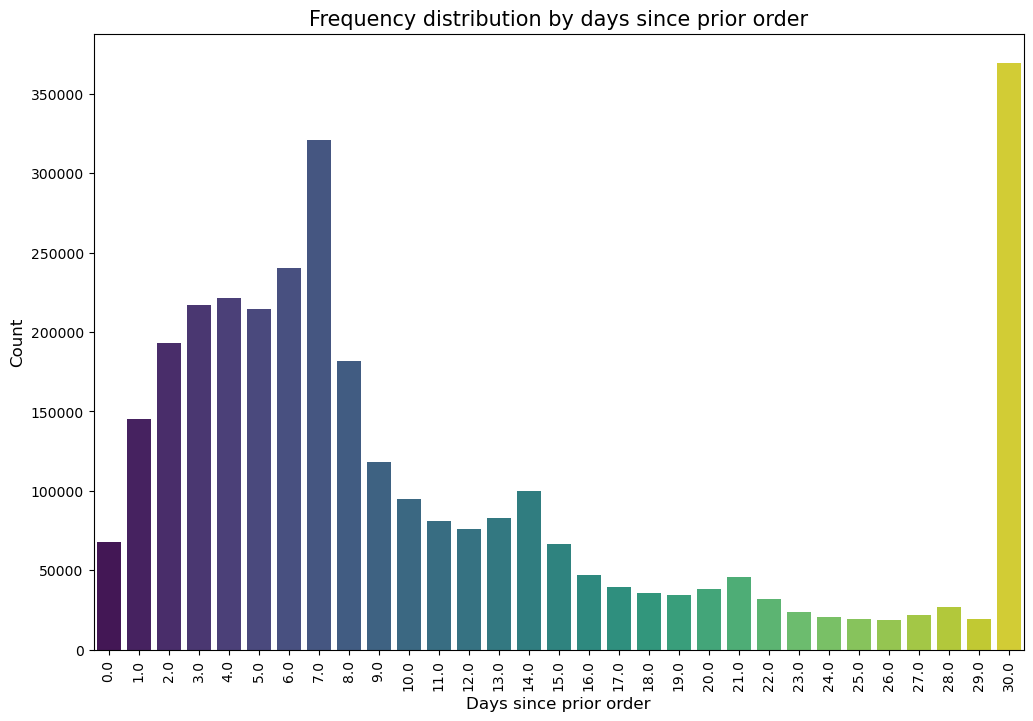

In [9]:
# distplot for time between orders
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders, palette='viridis')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

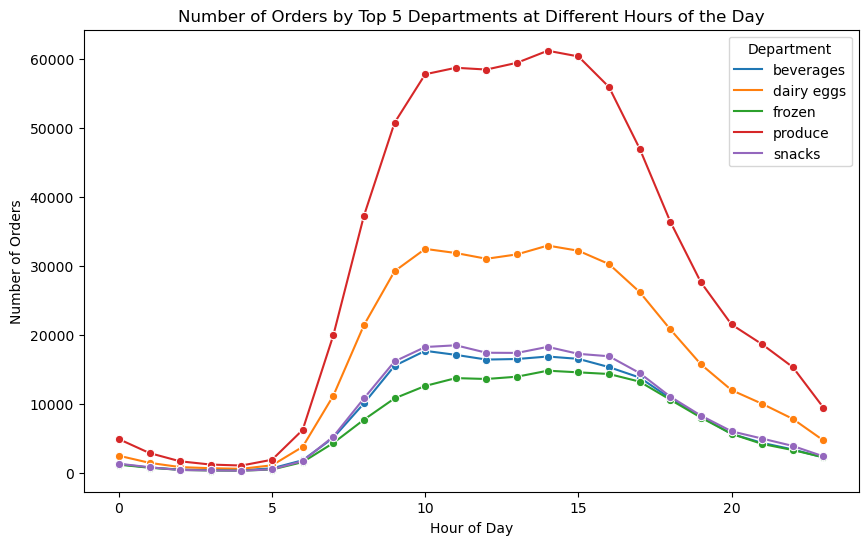

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'order_hour_of_day' and 'department' are columns in your DataFrame
# Group by hour_of_day and department, and then count the number of orders
orders_by_hour_department = all_orders.groupby(['order_hour_of_day', 'department']).size().reset_index(name='order_count')

# Rank departments within each hour based on order_count
orders_by_hour_department['rank'] = orders_by_hour_department.groupby('order_hour_of_day')['order_count'].rank(ascending=False, method='first')

# Select only the top 5 departments for each hour
top_departments_by_hour = orders_by_hour_department[orders_by_hour_department['rank'] <= 5]

# Create a line plot with lines connecting points for each department
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_hour_of_day', y='order_count', hue='department', data=top_departments_by_hour, marker='o')
plt.title('Number of Orders by Top 5 Departments at Different Hours of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend(title='Department')
plt.show()


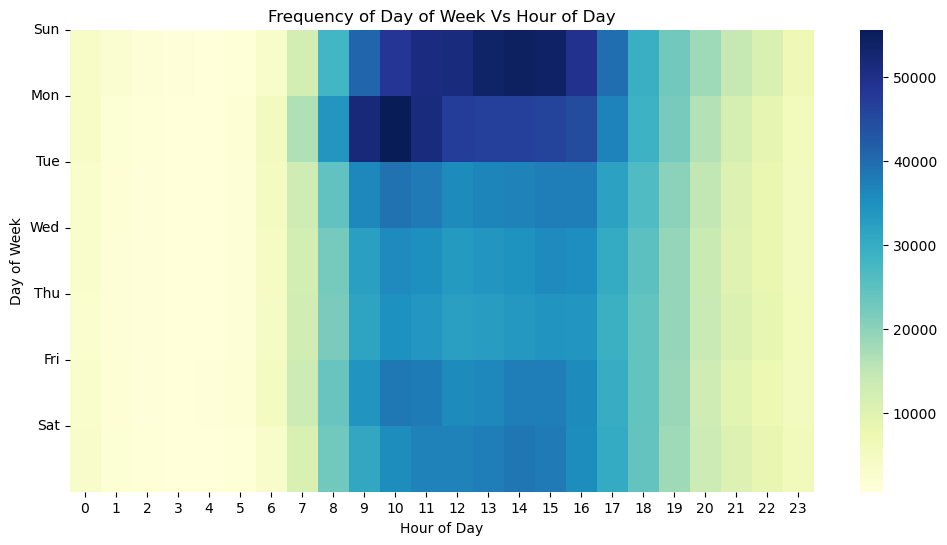

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'orders' is your DataFrame with columns 'order_dow' and 'order_hour_of_day'
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].count().reset_index()
grouped_df = grouped_df.pivot(index='order_dow', columns='order_hour_of_day', values='order_number')

# Define day labels
day_labels = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]

plt.figure(figsize=(12, 6))
sns.heatmap(grouped_df, cmap="YlGnBu", fmt='d')  # Remove annot=True

plt.title("Frequency of Day of Week Vs Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")

# Set y-tick labels
plt.yticks(range(len(day_labels)), day_labels, rotation=0)

plt.show()


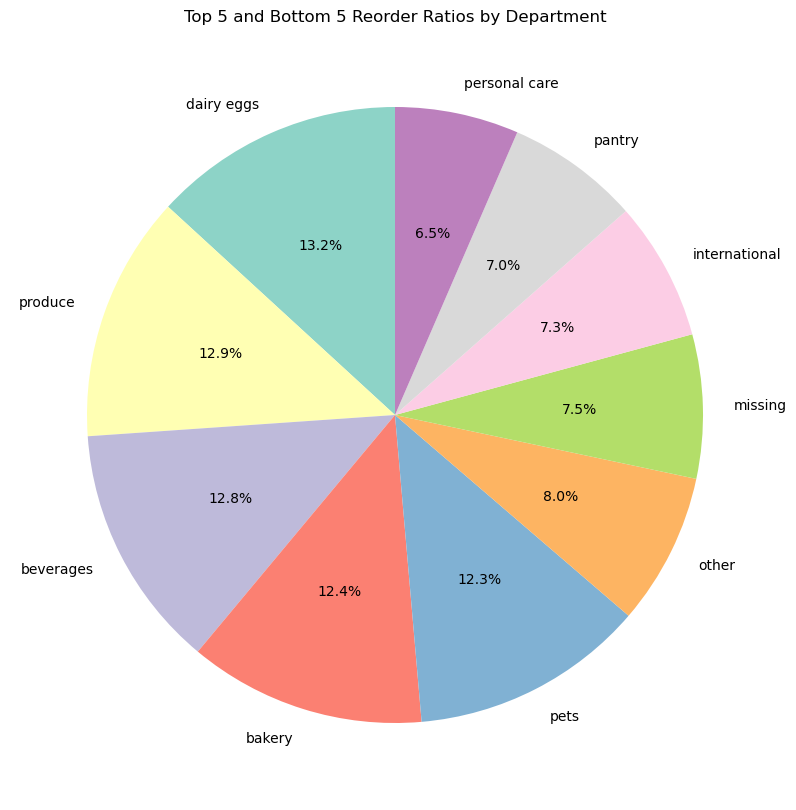

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'department' and 'reordered' are columns in your DataFrame
grouped_df = all_orders.groupby(["department"])["reordered"].mean().reset_index()

# Sort by reorder ratio in descending order
sorted_departments = grouped_df.sort_values(by='reordered', ascending=False)

# Select the top 5 and bottom 5 departments
top5_departments = sorted_departments.head(5)
bottom5_departments = sorted_departments.tail(5)

# Combine top 5 and bottom 5 for the pie chart
combined_departments = pd.concat([top5_departments, bottom5_departments])

plt.figure(figsize=(10, 10))
plt.pie(combined_departments['reordered'], labels=combined_departments['department'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Top 5 and Bottom 5 Reorder Ratios by Department')
plt.show()


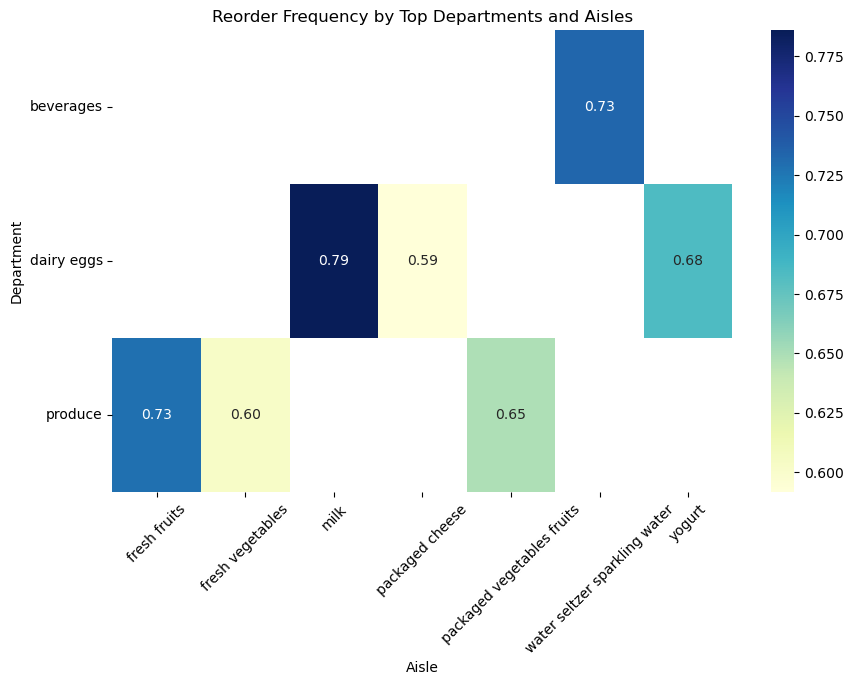

In [13]:
# Finding the top 5 most popular departments and aisles
top_departments = all_orders['department'].value_counts().head(7).index
top_aisles = all_orders['aisle'].value_counts().head(7).index
# Filtering the data
filtered_data = all_orders[all_orders['department'].isin(top_departments) & all_orders['aisle'].isin(top_aisles)]
# Calculating reorder rates for each department and aisle combination within the filtered data
filtered_dept_aisle_reorder = filtered_data.groupby(['department', 'aisle'])['reordered'].mean().unstack()
# Plotting with heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_dept_aisle_reorder, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Reorder Frequency by Top Departments and Aisles')
plt.xlabel('Aisle')
plt.ylabel('Department')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

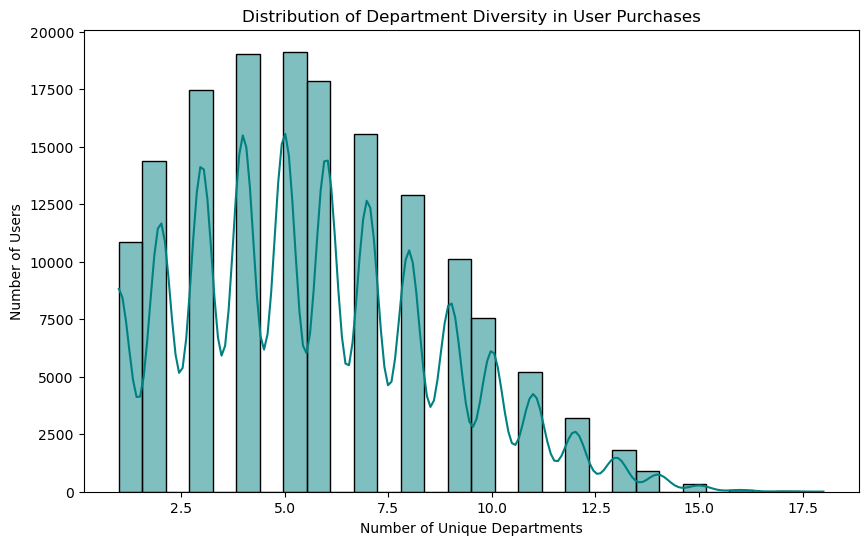

In [14]:
# Calculating the number of unique departments per user
user_dept_diversity = all_orders.groupby('user_id')['department'].nunique()
# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(user_dept_diversity, bins=30, kde=True, color='teal')
plt.title('Distribution of Department Diversity in User Purchases')
plt.xlabel('Number of Unique Departments')
plt.ylabel('Number of Users')
plt.show()

# PCA

In [15]:
# These lines create two DataFrames (aisle_hist and dept_hist) that summarize how many items each user added to their cart from each aisle and department.
aisle_hist = all_orders[['user_id','add_to_cart_order','aisle']].groupby(['user_id','aisle']).sum().reset_index()
dept_hist = all_orders[['user_id','add_to_cart_order','department']].groupby(['user_id','department']).sum().reset_index()

In [16]:
# This calculates the total number of items each user has added to their cart (across all aisles) and renames the sum to volume.
user_volume = aisle_hist.groupby('user_id')['add_to_cart_order'].sum()
user_volume = user_volume.reset_index().rename(columns = {'add_to_cart_order':'volume'})
aisle_hist = aisle_hist.merge(user_volume, how = 'inner', on = 'user_id')
dept_hist = dept_hist.merge(user_volume, how = 'inner', on = 'user_id')

In [17]:
#These lines create two DataFrames (aisle_hist and dept_hist) that summarize how many items each user added to their cart from each aisle and department.
aisle_hist['aisle_share'] = aisle_hist['add_to_cart_order'] / aisle_hist['volume']
dept_hist['dept_share'] = dept_hist['add_to_cart_order'] / dept_hist['volume']

In [18]:
# Here, the code calculates the share of each aisle and department in the total cart volume for each user.
aisle_vol_pivot = aisle_hist[['user_id','aisle','add_to_cart_order']].pivot(index = 'user_id', columns = 'aisle', values = 'add_to_cart_order')
aisle_share_pivot = aisle_hist[['user_id','aisle','aisle_share']].pivot(index = 'user_id', columns = 'aisle', values = 'aisle_share')
dept_vol_pivot = dept_hist[['user_id','department','add_to_cart_order']].pivot(index = 'user_id', columns = 'department', values = 'add_to_cart_order')
dept_share_pivot = dept_hist[['user_id','department','dept_share']].pivot(index = 'user_id', columns = 'department', values = 'dept_share')

In [19]:
# These lines create pivot tables for both aisle and department data. There are two types of pivots for each: one for volume (add_to_cart_order) and one for share (aisle_share or dept_share).
aisle_vol_pivot = aisle_hist[['user_id','aisle','add_to_cart_order']].pivot(index = 'user_id', columns = 'aisle', values = 'add_to_cart_order')
aisle_share_pivot = aisle_hist[['user_id','aisle','aisle_share']].pivot(index = 'user_id', columns = 'aisle', values = 'aisle_share')
dept_vol_pivot = dept_hist[['user_id','department','add_to_cart_order']].pivot(index = 'user_id', columns = 'department', values = 'add_to_cart_order')
dept_share_pivot = dept_hist[['user_id','department','dept_share']].pivot(index = 'user_id', columns = 'department', values = 'dept_share')
aisle_vol_pivot = aisle_vol_pivot.fillna(value = 0)
aisle_share_pivot = aisle_share_pivot.fillna(value = 0)
dept_vol_pivot = dept_vol_pivot.fillna(value = 0)
dept_share_pivot = dept_share_pivot.fillna(value = 0)

In [20]:
all_orders

,order_id,add_to_cart_order,reordered,order_hour_of_day,product_id,product_name,aisle_id,aisle,department_id,department,user_id
0,2,1,1,9,33120,Organic Egg Whites,86,eggs,16,dairy eggs,202279
1,26,5,0,16,33120,Organic Egg Whites,86,eggs,16,dairy eggs,153404
2,120,13,0,8,33120,Organic Egg Whites,86,eggs,16,dairy eggs,23750
3,327,5,1,9,33120,Organic Egg Whites,86,eggs,16,dairy eggs,58707
4,390,28,1,12,33120,Organic Egg Whites,86,eggs,16,dairy eggs,166654
...,...,...,...,...,...,...,...,...,...,...,...
2433078,660123,3,1,18,30259,Signature Collection Oregon Pinot Gris,62,white wines,5,alcohol,193331
2433079,34570,1,1,9,49562,Blanc De Noirs Sparkling Wine,134,specialty wines champagnes,5,alcohol,37901
2433080,1131825,2,0,17,3437,Melatonin Chewable Lozenges 3 Mg,6,other,2,other,70689
2433081,52161,1,0,10,17625,"Detoxificant, No. 7",6,other,2,other,128655


In [21]:
prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
1048461,110706,14346,9,1
1048462,110707,47601,1,0
1048463,110707,34551,2,0
1048464,110707,47986,3,0


In [22]:
aisle_share_pivot

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.045455
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
5,0.111111,0.244444,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
7,0.000000,0.000000,0.0,0.0,0.0,0.0,0.072072,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.157895
206206,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
206207,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031496,0.0,0.062992


In [28]:
aisle_share_pivot_subsampled = aisle_share_pivot.sample(n=10000, random_state=42)


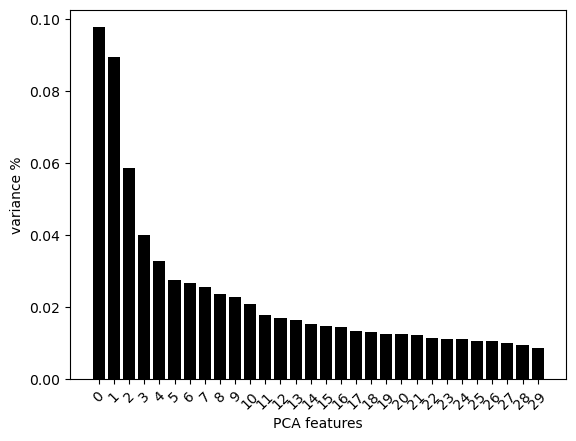

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components = 30)
principalComponents = pca.fit_transform(aisle_share_pivot_subsampled)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color = 'black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.xticks(rotation = 45)

PCA_components = pd.DataFrame(principalComponents)

In [33]:
#sns.pairplot(PCA_components[[0,1,2,3,4,5]])

# DBSCAN

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [41]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np

# Define range of parameter values to search
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(2, 10)

best_score = -1
best_params = {}

# Iterate over parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        # Create DBSCAN object with current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # Fit DBSCAN to the data
        dbscan.fit(principalComponents)
        
        # Get cluster labels
        cluster_labels = dbscan.labels_
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(principalComponents, cluster_labels)
        
        # Update best parameters if silhouette score is better
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_params['eps'] = eps
            best_params['min_samples'] = min_samples

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

# EM Gaussian 

In [42]:
from sklearn.mixture import GaussianMixture

# Create a Gaussian Mixture Model object
gmm = GaussianMixture(n_components=10, random_state=42)  # You can adjust the number of components

# Fit GMM to the data
gmm.fit(principalComponents)

# Get cluster labels
cluster_labels = gmm.predict(principalComponents)

# Get the number of clusters
n_clusters = len(np.unique(cluster_labels))

print('Estimated number of clusters:', n_clusters)


Estimated number of clusters: 10


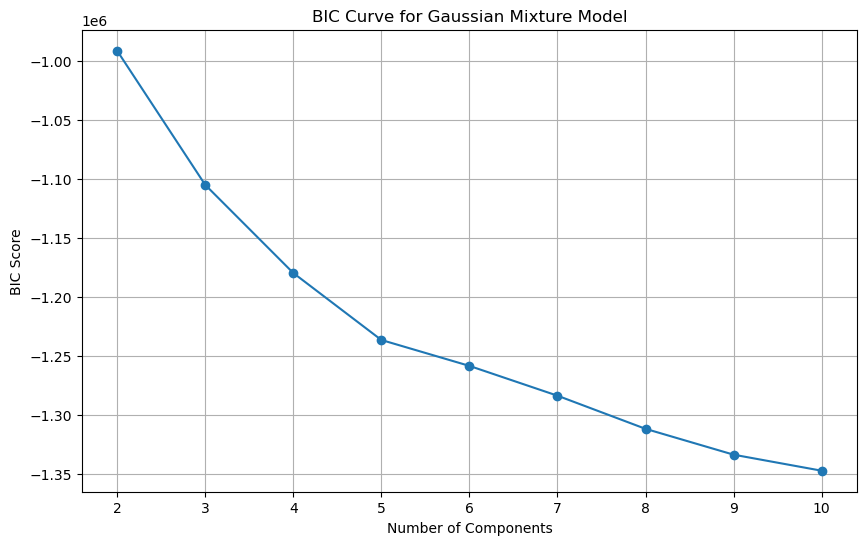

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Define a range of number of components to explore
num_components_range = range(2, 11)

# Initialize an empty list to store BIC scores
bic_scores = []

# Iterate over number of components
for n_components in num_components_range:
    # Create a Gaussian Mixture Model object
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    
    # Fit GMM to the data
    gmm.fit(principalComponents)
    
    # Calculate BIC score and append to list
    bic_scores.append(gmm.bic(principalComponents))

# Plot BIC scores
plt.figure(figsize=(10, 6))
plt.plot(num_components_range, bic_scores, marker='o', linestyle='-')
plt.title('BIC Curve for Gaussian Mixture Model')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.xticks(num_components_range)
plt.grid(True)
plt.show()


In [53]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

# Define a range of parameter values to search
num_components_range = 5  # Number of components
covariance_types = ['full', 'tied', 'diag', 'spherical']  # Covariance type
init_methods = ['kmeans', 'random']  # Initialization method

best_score = -1
best_params = {}

# Iterate over parameter combinations
for covariance_type in covariance_types:
    for init_method in init_methods:
            # Create a Gaussian Mixture Model object with current parameters
        gmm = GaussianMixture(n_components=5, covariance_type=covariance_type, init_params=init_method, random_state=42)
            
            # Fit GMM to the data
        gmm.fit(principalComponents)
            
            # Get cluster labels
        cluster_labels = gmm.predict(principalComponents)
            
            # Calculate silhouette score
        silhouette_avg = silhouette_score(principalComponents, cluster_labels)
            
            # Update best parameters if silhouette score is better
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_params['n_components'] = n_components
            best_params['covariance_type'] = covariance_type
            best_params['init_method'] = init_method

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)


Best Silhouette Score: 0.14196675821762367
Best Parameters: {'n_components': 0, 'covariance_type': 'tied', 'init_method': 'kmeans'}


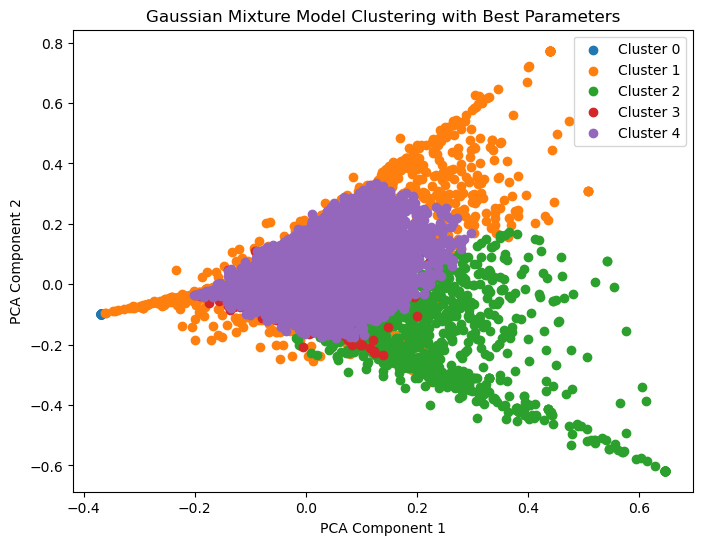

In [47]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Create a Gaussian Mixture Model object with the best parameters
best_gmm = GaussianMixture(n_components=5, covariance_type='spherical', init_params='kmeans', random_state=42)

# Fit the GMM to the data
best_gmm.fit(principalComponents)

# Get cluster labels
cluster_labels = best_gmm.predict(principalComponents)

# Visualize clusters
plt.figure(figsize=(8, 6))

# Get unique labels
unique_labels = np.unique(cluster_labels)

# Plot each cluster
for label in unique_labels:
    # Plot points of this cluster
    cluster_points = principalComponents[cluster_labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label='Cluster {}'.format(label))

plt.title('Gaussian Mixture Model Clustering with Best Parameters')
plt.xlabel(' Component 1')
plt.ylabel(' Component 2')
plt.legend()
plt.show()


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


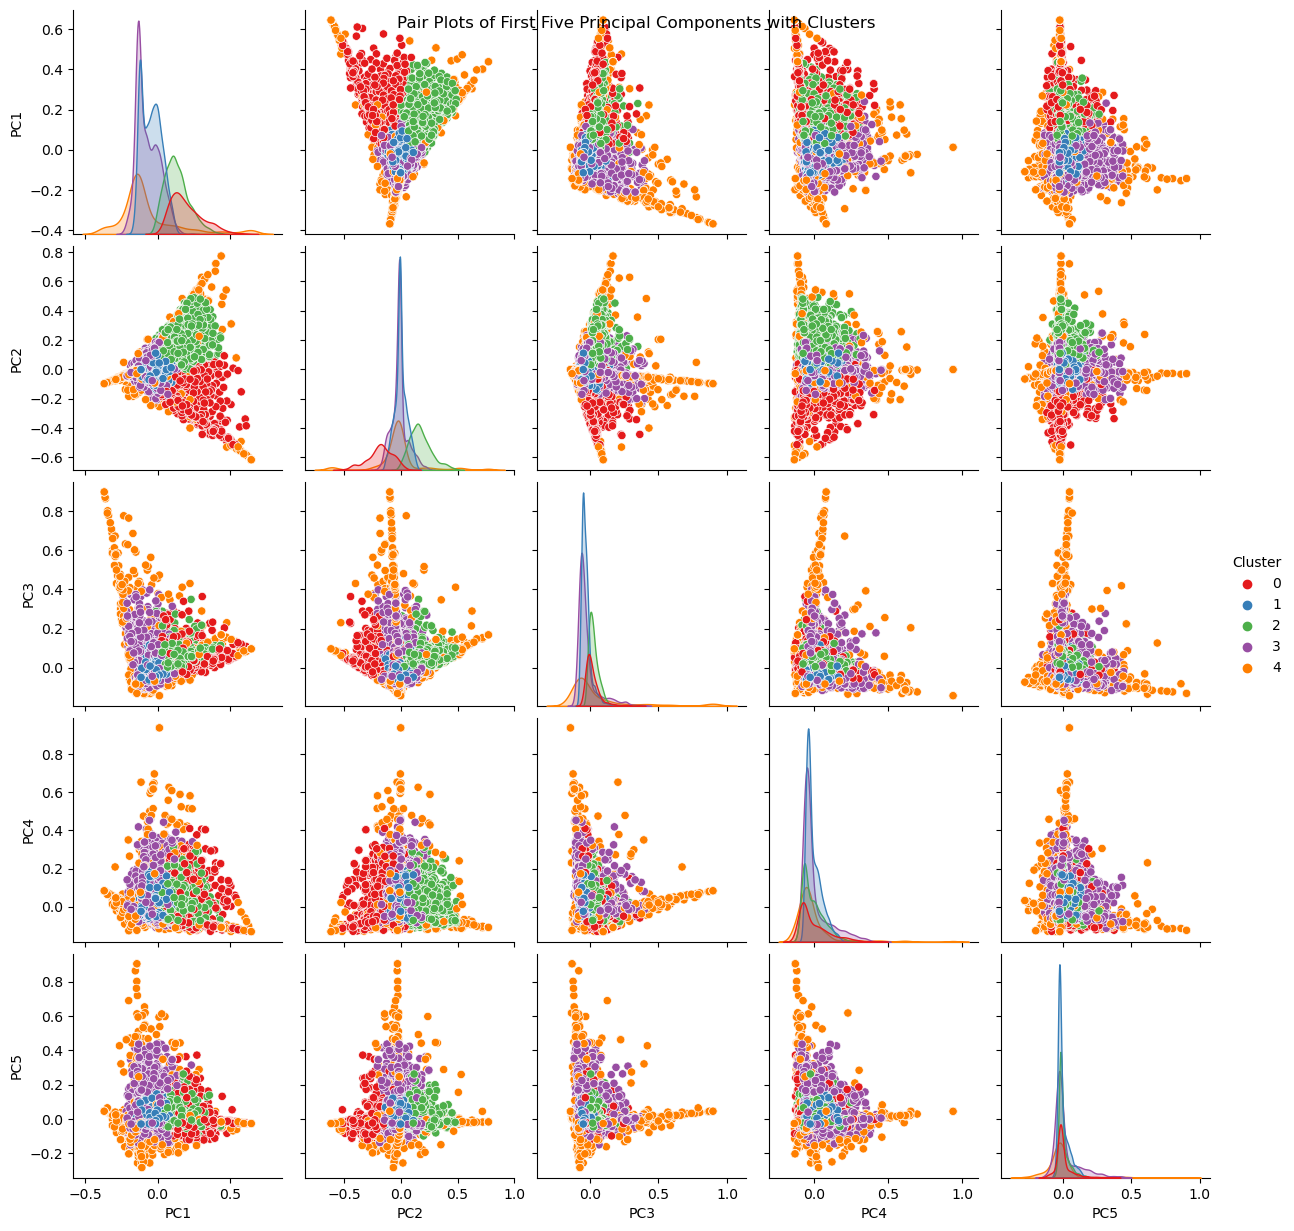

In [54]:
df_pca = pd.DataFrame(principalComponents[:, :5], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Add cluster labels to the DataFrame
df_pca['Cluster'] = cluster_labels

# Plot pair plots
sns.pairplot(df_pca, hue='Cluster', palette='Set1')
plt.suptitle('Pair Plots of First Five Principal Components with Clusters')
plt.show()


# Kmeans

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Replace this with your actual preprocessed DataFrame
# aisle_share_pivot = ...

sse = {}
silhouette_coefficients = {}
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(aisle_share_pivot_subsampled)
    sse[k] = kmeans.inertia_  # Sum of squared distances of samples to their closest cluster center
    labels = kmeans.labels_
    silhouette_coefficients[k] = silhouette_score(aisle_share_pivot, labels)

# Plotting the SSE (Elbow Curve)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")  # SSE = Sum of Squared Errors
plt.title('Elbow Method For Optimal k')
plt.show()

# Plotting the silhouette scores
plt.figure()
plt.plot(list(silhouette_coefficients.keys()), list(silhouette_coefficients.values()), 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Silhouette Coefficient For Each k')
plt.show()

# Output the silhouette scores
print("Silhouette Coefficients:")
for k in silhouette_coefficients:
    print(f"Clusters: {k}, Score: {silhouette_coefficients[k]}")


In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score

# Define a custom scorer that uses the silhouette score
def silhouette_scorer(estimator, X):
    clusters = estimator.fit_predict(X)
    score = silhouette_score(X, clusters)
    return score

# Create a KMeans instance with some hyperparameters that remain fixed
kmeans = KMeans(random_state=42)

# Define a parameter grid to search over
param_grid = {
    'n_clusters': range(2, 11),  # Number of clusters
    'init': ['k-means++', 'random'],  # Initialization method
    'n_init': [10, 15, 20],  # Number of initializations to perform
}

# Define the grid search with the custom scorer
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, scoring=make_scorer(silhouette_scorer), cv=5)

# Fit the grid search to the data
grid_search.fit(aisle_share_pivot)  # Replace with your data

# The best hyperparameter setting found
print("Best parameters found: ", grid_search.best_params_)

# The best score
print("Best silhouette score found: ", grid_search.best_score_)


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
cluster_df = pd.concat([PCA_components[[0,1,2,3,4,5]],pd.Series(labels[6]).rename('cluster')], axis = 1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cluster_df is your DataFrame with clustering results and it has columns named '0' and '1' for the first two principal components or features,
# and a 'cluster' column with cluster labels.

# Selecting two features or principal components to plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=cluster_df, x=0, y=1, hue='cluster', palette='viridis', s=100, alpha=0.7)

# Enhancing the plot
plt.title('Cluster Visualization on Two Dimensions')
plt.xlabel('Feature or PC 1')
plt.ylabel('Feature or PC 2')
plt.legend(title='Cluster')
plt.grid(True)  # Optional: Adds a grid for better readability

plt.show()


In [ ]:
cluster_df = pd.concat([pd.Series(aisle_share_pivot.index),cluster_df],axis = 1)


In [ ]:
cluster_df

# Cluster analysis

In [ ]:
#These lines merge the aisle_hist DataFrame with a cluster_df DataFrame on the user_id column. The cluster_df likely contains user clustering information (e.g., from a clustering algorithm like K-Means). 
cluster_aisle_br = aisle_hist.merge(cluster_df[['user_id','cluster']], on = 'user_id')

In [ ]:
#The column aisle_share is then renamed to user_aisle_share.
cluster_aisle_br = cluster_aisle_br.rename(columns = {'aisle_share':'user_aisle_share'})

In [ ]:
aisle_hist = aisle_hist.merge(cluster_df[['user_id','cluster']], on = 'user_id')
aisle_hist = aisle_hist.rename(columns = {'aisle_share':'user_aisle_share'})

In [ ]:
dept_hist = dept_hist.merge(cluster_df[['user_id','cluster']], on = 'user_id')
dept_hist = dept_hist.rename(columns = {'dept_share':'user_dept_share'})

In [ ]:
#This line initializes an empty DataFrame cluster_aisle_br with specified columns.
cluster_aisle_br = pd.DataFrame(columns = ['aisle','add_to_cart_order','aisle_share','cluster'])
for i in range(0,6):
    x = aisle_hist[aisle_hist['cluster'] == i]
    x = x.groupby('aisle')['add_to_cart_order'].sum().reset_index()
    x['aisle_share'] = x['add_to_cart_order']
    x['aisle_share'] = x['aisle_share'].apply(lambda f: f / x['add_to_cart_order'].sum())
    x['cluster'] = i
    cluster_aisle_br = pd.concat([x,cluster_aisle_br], axis = 0)

The above loop iterates over clusters (assuming 6 clusters: 0 to 5). For each cluster:

It filters aisle_hist for that cluster.
Groups by aisle and sums add_to_cart_order.
Calculates the share of each aisle in the total orders of the cluster.
Adds the cluster identifier.
Concatenates these results to cluster_aisle_br.

# Creating Heatmaps for Top Aisles and Departments in Clusters

In [ ]:
#Identify the top 20 and top 30 aisles based on total add_to_cart_order.
t20 = list(aisle_hist.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False)[0:20].index)
t30 = list(aisle_hist.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False)[0:30].index)

In [ ]:
#filter cluster_aisle_br for the top 20 aisles.
#Pivot this data to prepare for a heatmap, where aisles are the rows, clusters are the columns, and aisle_share are the values.
aisle_heat = cluster_aisle_br[cluster_aisle_br['aisle'].isin(t20)]
aisle_heat = aisle_heat.pivot(index = 'aisle', columns = 'cluster', values = 'aisle_share')
sns.heatmap(aisle_heat,cmap="YlGnBu")

In [ ]:
for i in range(0,6):
    x = sns.barplot(data = cluster_aisle_br[cluster_aisle_br['cluster'] == i].sort_values('aisle_share', ascending = False)[0:10], x = 'aisle', y = 'aisle_share')
    x.set_xticklabels(x.get_xticklabels(), rotation=90)
    plt.title(str(i))
    x.set(xlabel = 'Aisle', ylabel = 'Aisle Share')
    plt.figure()

This loop creates bar plots for each cluster (0 to 5). For each cluster:

It filters cluster_aisle_br for the specific cluster and sorts by aisle_share.
Creates a bar plot for the top 10 aisles in that cluster.
Rotates the x-axis labels for readability.
Sets the plot title to the cluster number.

In [ ]:
cluster_dept_br = pd.DataFrame(columns = ['department','add_to_cart_order','dept_share','cluster'])
for i in range(0,6):
    x = dept_hist[dept_hist['cluster_x'] == i]
    x = x.groupby('department')['add_to_cart_order'].sum().reset_index()
    x['dept_share'] = x['add_to_cart_order']
    x['dept_share'] = x['dept_share'].apply(lambda f: f / x['add_to_cart_order'].sum())
    x['cluster'] = i
    cluster_dept_br = pd.concat([x,cluster_dept_br], axis = 0)

In [ ]:
cluster_dept_br[cluster_dept_br['cluster'] == 5].dept_share.sum()

In [ ]:
dept_heat = cluster_dept_br.pivot(index = 'department', columns = 'cluster', values = 'dept_share')
sns.heatmap(dept_heat,cmap="YlGnBu")

These lines repeat a similar process for departments:

Initialize a new DataFrame cluster_dept_br.
For each cluster, calculate the sum of add_to_cart_order by department.
Calculate the department share within each cluster.
Concatenate these results to cluster_dept_br.
Create a pivot table for a heatmap and plot it.

This series of steps is for analyzing and visualizing user purchase behaviors within different clusters based on aisle and department data, revealing patterns and preferences across different user segments.

In [ ]:
cluster_dept_br

In [ ]:
pd.DataFrame(cluster_df['cluster'].value_counts().reset_index())

In [ ]:
cluster_df['cluster'].value_counts().sort_index() / cluster_df['cluster'].value_counts().sum() * 100

This counts the number of occurrences of each cluster (as defined in the cluster column of cluster_df) and sorts these counts based on the cluster index.
The result is then divided by the total number of users to get the proportion of users in each cluster.
Multiplying by 100 converts this proportion into a percentage.

In [ ]:
cluster_aisle_br.groupby('cluster')['add_to_cart_order'].sum() / cluster_aisle_br['add_to_cart_order'].sum() * 10

This sums the add_to_cart_order values for each cluster in the cluster_aisle_br DataFrame.
This sum is then divided by the total sum of add_to_cart_order across all clusters to get the proportion of total unit purchases that each cluster represents.
Multiplying by 100 converts this proportion into a percentage.

In [ ]:
#calculating the proportion of the total user base that each cluster represents.
x = pd.concat([cluster_df['cluster'].value_counts().sort_index() / cluster_df['cluster'].value_counts().sum() * 100,cluster_aisle_br.groupby('cluster')['add_to_cart_order'].sum() / cluster_aisle_br['add_to_cart_order'].sum() * 100], axis = 1)
x.rename(columns = {'cluster':'User Share','add_to_cart_order':'Unit Purchase Share'})

This is used to concatenate the results of the two previous calculations into a single DataFrame, x.
The first column of x will represent the user share of each cluster (percentage of total users in each cluster), and the second column will represent the unit purchase share of each cluster (percentage of total units purchased by each cluster).

In [ ]:
cluster_df.head()

In [ ]:
cluster_aisle_br

In [ ]:
all_orders = all_orders.merge(cluster_df[['user_id','cluster']], on = 'user_id')

This step is likely intended to add cluster information to each order in all_orders, thus allowing for analysis of orders based on the clusters to which users belong.

In [ ]:
all_orders

In [ ]:
# cluster_df.to_csv('cluster_df')

In [ ]:
# all_orders.to_csv('all_orders.csv')

# Association rules

In [ ]:
orders = all_orders.sort_values(['order_id','product_id'])
orders

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from itertools import combinations, groupby
from collections import Counter

# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().to_numpy()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))

In [ ]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) 


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) 


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders)

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [ ]:
# separate order data by cluster and transform into expected format of group association function

cluster_orders = {}
for x in range(0,6):
    i = orders[orders['cluster'] == x]
    i = i.set_index('order_id')['product_id'].rename('item_id')
    cluster_orders[x] = i

In [ ]:
# run each cluster series through association rule function and obtain association rules at item level

group_association_rules_dic = {}
for x in range(0,6):
    group_association_rules_dic[x] = association_rules(cluster_orders[x],.0001)

In [ ]:
# format item association rule dataframes and merge product names

for x in group_association_rules_dic:
    group_association_rules_dic[x] = group_association_rules_dic[x].merge(products[['product_id','product_name']]
               .rename(columns = {'product_id':'item_A','product_name':'product_name_A'}), on = 'item_A')
    group_association_rules_dic[x] = group_association_rules_dic[x].merge(products[['product_id','product_name']]
               .rename(columns = {'product_id':'item_B','product_name':'product_name_B'}), on = 'item_B')
    group_association_rules_dic[x] = group_association_rules_dic[x][['item_A','item_B','product_name_A',
                                                                    'product_name_B','freqAB','supportAB','freqA',
                                                                    'supportA','freqB','supportB','confidenceAtoB',
                                                                    'confidenceBtoA','lift']]
    

In [ ]:
# example of association rule dataframe

x = group_association_rules_dic[5]
x.sort_values('lift', ascending = False)

In [ ]:
# separate order data by cluster and transform into expected format of group association function at aisle level

cluster_aisle_orders = {}
for x in range(0,6):
    i = orders[orders['cluster'] == x]
    i = i.groupby(['order_id','aisle_id'])['product_id'].count().reset_index().set_index('order_id')['aisle_id'].rename('item_id')
    cluster_aisle_orders[x] = i

In [ ]:
orders.groupby(['order_id','aisle_id'])['product_id'].count().reset_index().set_index('order_id')['aisle_id'].rename('item_id')


In [ ]:
orders[orders['cluster'] == 5]['order_id'].nunique()

In [ ]:
# run association function at aisle level

group_aisle_association_rules_dic = {}
for x in range(0,6):
    group_aisle_association_rules_dic[x] = association_rules(cluster_aisle_orders[x],.0001)

In [ ]:
# reformat cluster aisle assocation dataframes

for x in group_aisle_association_rules_dic:
    group_aisle_association_rules_dic[x] = group_aisle_association_rules_dic[x].merge(aisles[['aisle_id','aisle']]
               .rename(columns = {'aisle_id':'item_A','aisle':'aisle_name_A'}), on = 'item_A')
    group_aisle_association_rules_dic[x] = group_aisle_association_rules_dic[x].merge(aisles[['aisle_id','aisle']]
               .rename(columns = {'aisle_id':'item_B','aisle':'aisle_name_B'}), on = 'item_B')
    group_aisle_association_rules_dic[x] = group_aisle_association_rules_dic[x][['item_A','item_B','aisle_name_A',
                                                                    'aisle_name_B','freqAB','supportAB','freqA',
                                                                    'supportA','freqB','supportB','confidenceAtoB',
                                                                    'confidenceBtoA','lift']]
    group_aisle_association_rules_dic[x] = group_aisle_association_rules_dic[x].rename(columns = {'item_A':'aisle_A','item_B':'aisle_B'})

In [ ]:
x = group_aisle_association_rules_dic[5].sort_values('lift',ascending = False)
x.sort_values('lift',ascending = False)

In [ ]:
cluster_df['cluster'].value_counts() / cluster_df['cluster'].value_counts().sum()

In [ ]:
for x in group_association_rules_dic:
   group_association_rules_dic[x].to_csv('group'+str(x)+'_item_rules.csv')

In [ ]:
for x in group_aisle_association_rules_dic:
    group_aisle_association_rules_dic[x].to_csv('group'+str(x)+'_aisle_rules.csv')

In [ ]:
group_aisle_association_rules_dic

# Recommendation System

In [ ]:
from itertools import combinations, groupby, chain

In [ ]:
cluster0_item_rules = pd.read_csv('group0_item_rules.csv', index_col = 0)
cluster1_item_rules = pd.read_csv('group1_item_rules.csv', index_col = 0)
cluster2_item_rules = pd.read_csv('group2_item_rules.csv', index_col = 0)
cluster3_item_rules = pd.read_csv('group3_item_rules.csv', index_col = 0)
cluster4_item_rules = pd.read_csv('group4_item_rules.csv', index_col = 0)
cluster5_item_rules = pd.read_csv('group5_item_rules.csv', index_col = 0)
cluster0_aisle_rules = pd.read_csv('group0_aisle_rules.csv', index_col = 0)
cluster1_aisle_rules = pd.read_csv('group1_aisle_rules.csv', index_col = 0)
cluster2_aisle_rules = pd.read_csv('group2_aisle_rules.csv', index_col = 0)
cluster3_aisle_rules = pd.read_csv('group3_aisle_rules.csv', index_col = 0)
cluster4_aisle_rules = pd.read_csv('group4_aisle_rules.csv', index_col = 0)
cluster5_aisle_rules = pd.read_csv('group5_aisle_rules.csv', index_col = 0)

In [ ]:
cluster_df = clusters.set_index('user_id')
cluster_df

In [ ]:
cluster_item_rules_dic = {}
cluster_item_rules_dic[0] = cluster0_item_rules
cluster_item_rules_dic[1] = cluster1_item_rules
cluster_item_rules_dic[2] = cluster2_item_rules
cluster_item_rules_dic[3] = cluster3_item_rules
cluster_item_rules_dic[4] = cluster4_item_rules
cluster_item_rules_dic[5] = cluster5_item_rules

In [ ]:
cluster_aisle_rules_dic = {}
cluster_aisle_rules_dic[0] = cluster0_aisle_rules
cluster_aisle_rules_dic[1] = cluster1_aisle_rules
cluster_aisle_rules_dic[2] = cluster2_aisle_rules
cluster_aisle_rules_dic[3] = cluster3_aisle_rules
cluster_aisle_rules_dic[4] = cluster4_aisle_rules
cluster_aisle_rules_dic[5] = cluster5_aisle_rules

In [ ]:
# returns top x items associated based on lift

def product_to_product(cluster, product_id, item_lift, product_name, num_products):
    df = cluster_item_rules_dic[cluster]
    df = df[(df['item_A'] == product_id) | (df['item_B'] == product_id)][['product_name_A','item_A','product_name_B','item_B','confidenceAtoB','lift']].sort_values('lift', ascending = False)
    df = df[df['lift'] > item_lift]
    df = df.sort_values('lift', ascending = False)
    df = df.head(n = num_products)
    product_to_product_associations = df['product_name_A'].values.tolist()
    for x in df['product_name_B'].values.tolist():
        product_to_product_associations.append(x)
    product_to_product_associations = [x for x in product_to_product_associations if x != product_name]
    return product_to_product_associations

In [ ]:
# returns recommended products given inputs

def pdp_recommender(user_id, product_id, item_lift, num_products):
    product_name = products.at[product_id,'product_name']
    aisle_id = products.at[product_id,'aisle_id']
    aisle_name = aisles.at[aisle_id,'aisle']
    cluster = cluster_df.at[user_id, 'cluster']
    print(cluster)
    return product_to_product(cluster = cluster, product_id = product_id, item_lift = item_lift, 
                              product_name = product_name, num_products = num_products)

In [ ]:
# results for users in the 6 different clusters

users = [10000,2631,954,101,481,721]
i = 0
for x in users:
    print('cluster ' + str(i) + str(pdp_recommender(x,39055,1,5)))
    i = i + 1